Chuck Examples https://chuck.cs.princeton.edu/doc/examples/
Chuck API https://chuck.cs.princeton.edu/doc/reference/

In [1]:
%load_ext autoreload
%autoreload 2

2025-03-10 17:34:47.883 | INFO     | pychuck:run:69 - [chuck]: (VM) sporking incoming shred: 2 (78be5d8cefe68f9d17431f54b62d4ee3b151334640b9606cb5ac94ee171be4c8.ck)...
2025-03-10 17:34:47.884 | INFO     | pychuck:run:69 - [chuck]: (VM) removing shred: 2 (78be5d8cefe68f9d17431f54b62d4ee3b151334640b9606cb5ac94ee171be4c8.ck)...


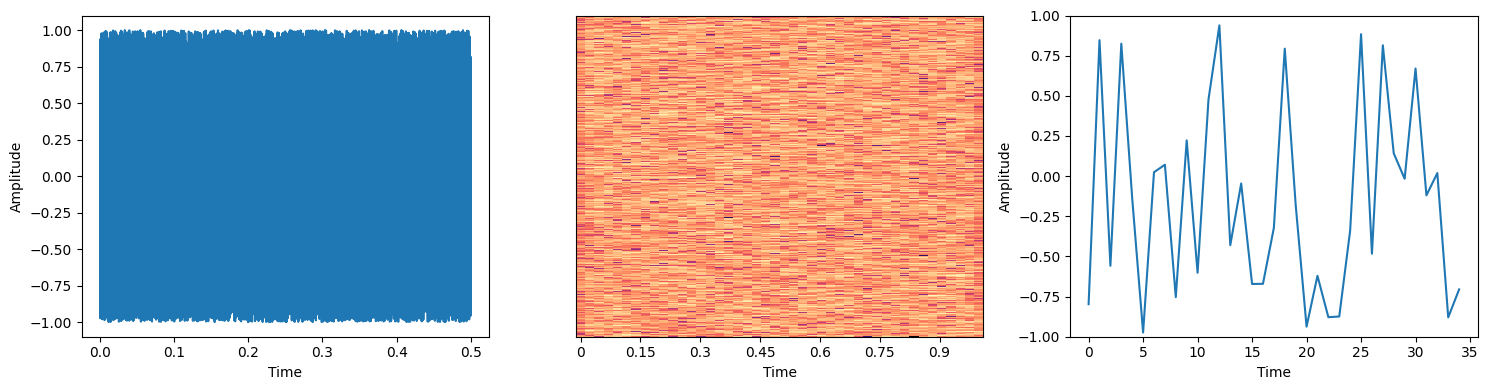

In [4]:
from pychuck import ChuckShred, shreds_to_audio
from audio_utils import play_audio, mfcc_hash


noise = ChuckShred("""


Noise noise => dac;

while( true ) {
    1000::ms => now;
}
""")

res = shreds_to_audio(noise, num_ms=500)

res.display()

2025-03-10 17:35:16.648 | INFO     | pychuck:run:69 - [chuck]: (VM) sporking incoming shred: 2 (4b4d507914dad64ef47aa46d19c193ceb413730d895eccc9500e5a32454cc7e7.ck)...
2025-03-10 17:35:16.649 | INFO     | pychuck:run:69 - [chuck]: (VM) removing shred: 2 (4b4d507914dad64ef47aa46d19c193ceb413730d895eccc9500e5a32454cc7e7.ck)...


num samples: 132300
d27634509440bfbc2efc7bb32e96b72b5fda415d1b2d3f9a11b24c4c2a376f5a


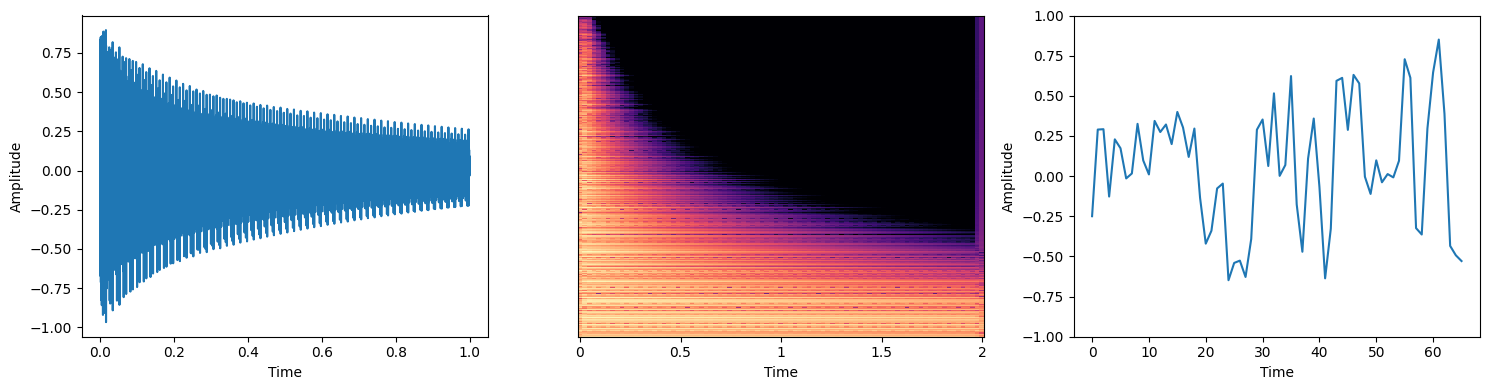

In [6]:
from pychuck import ChuckShred, shreds_to_audio
from audio_utils import play_audio


ks_shred = ChuckShred(
    """

Math.srandom( {{ seed }} );

Noise imp => OneZero lowpass => dac;

// feedback
lowpass => Delay delay => lowpass;

// our radius
.99999 => float R;
// our delay order
800 => float L;
// set delay
L::samp => delay.delay;
// set dissipation factor
Math.pow( R, L ) => delay.gain;
// place zero
-1 => lowpass.zero;

// fire excitation
1 => imp.gain;
// for one delay round trip
L::samp => now;
// cease fire
0 => imp.gain;

// advance time
(Math.log(.0001) / Math.log(R))::samp => now;
""",
    seed=0,
)


output = shreds_to_audio(ks_shred, num_ms=3000)
print(f"num samples: {len(output.samples)}")
print((output.sha256))
output.display()

In [16]:
from pychuck import ChuckShred, shreds_to_audio
from audio_utils import play_audio


_shred = ChuckShred(
    """

Math.srandom( {{ seed | default(0) }} );

Impulse imp  => dac;
dac => Delay delay => dac;

1.0 => imp.next;

2::samp => delay.delay;

// advance time
500::samp => now;

""",
    # seed=0
)


output = shreds_to_audio(_shred, num_ms=2)
print(f"num samples: {len(output.samples)}")
print((output.sha256))
# output.display()
import numpy as np

output.samples.round(3) * 1000

2025-03-10 17:38:55.473 | INFO     | pychuck:run:69 - [chuck]: (VM) sporking incoming shred: 2 (791c46446eff47ded61fe75c6d990ff7f87eebab4db571507ad334a96de5d043.ck)...
2025-03-10 17:38:55.475 | INFO     | pychuck:run:69 - [chuck]: (VM) removing shred: 2 (791c46446eff47ded61fe75c6d990ff7f87eebab4db571507ad334a96de5d043.ck)...


num samples: 88
02705666561c826b8ebd468d304c95559a0d6fe9d98cbf21710c8aa7cbf084b2


array([1000.,    0.,    0., 1000.,    0.,    0., 1000.,    0.,    0.,
       1000.,    0.,    0., 1000.,    0.,    0., 1000.,    0.,    0.,
       1000.,    0.,    0., 1000.,    0.,    0., 1000.,    0.,    0.,
       1000.,    0.,    0., 1000.,    0.,    0., 1000.,    0.,    0.,
       1000.,    0.,    0., 1000.,    0.,    0., 1000.,    0.,    0.,
       1000.,    0.,    0., 1000.,    0.,    0., 1000.,    0.,    0.,
       1000.,    0.,    0., 1000.,    0.,    0., 1000.,    0.,    0.,
       1000.,    0.,    0., 1000.,    0.,    0., 1000.,    0.,    0.,
       1000.,    0.,    0., 1000.,    0.,    0., 1000.,    0.,    0.,
       1000.,    0.,    0., 1000.,    0.,    0., 1000.])